<a href="https://colab.research.google.com/github/shuklahrs/Machine-Learning-Models-/blob/Stock-Prediction/STOCK_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**STOCK PRICE PREDICTION** 

#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from  sklearn.model_selection import train_test_split

#Importing Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving INR=X.csv to INR=X.csv


In [29]:
dataset = pd.read_csv('INR=X.csv')

In [4]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       262 non-null    object 
 1   Open       262 non-null    float64
 2   High       262 non-null    float64
 3   Low        262 non-null    float64
 4   Close      262 non-null    float64
 5   Adj Close  262 non-null    float64
 6   Volume     262 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.5+ KB


In [6]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.0
mean,74.373533,74.631087,74.011048,74.358489,74.358489,0.0
std,1.417620,1.494521,1.311330,1.426245,1.426245,0.0
min,71.100403,71.279999,71.064003,71.099998,71.099998,0.0
25%,73.546175,73.706577,73.202003,73.531049,73.531049,0.0
50%,74.332001,74.531300,73.881748,74.275799,74.275799,0.0
75%,75.484551,75.737499,75.067053,75.489424,75.489424,0.0
max,77.684998,77.754997,76.496300,77.570000,77.570000,0.0


#Data Preparation 

In [40]:
from sklearn import preprocessing
def prepare_data(dataset, forecast_col, forecast_out, test_size):

    #creating a new collumn called as label that contains last 5 rows as nan
    label = dataset[forecast_col].shift( -forecast_out)

    #creating the feature array
    X = np.array(dataset[[forecast_col]])

    #preprocessing the featured array
    X = preprocessing.scale(X)

    #creating a column i want to use later in the  predicting model
    X_lately = X[ -forecast_out: ]

    #X that will contain training and testing data
    X = X[:-forecast_out]
    
    #dropping the na values
    label.dropna(inplace = True)

    #assigning Y
    y = np.array(label)

    #Splitting the dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 0)

    response = [X_train, X_test, y_train, y_test, X_lately]

    return response

#Initializing the neended data

In [41]:
forecast_col = 'Close'
forecast_out = 5
test_size = 0.2

#Splitting the dataset into Training set and Test set

In [42]:
X_train, X_test, y_train, y_test, X_lately = prepare_data(dataset, forecast_col, forecast_out, test_size);

#Training the model through Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

#Predicting the Output

In [58]:
score = regression.score(X_test, y_test)
forecast = regression.predict(X_lately)
response = {}
response['test_score='] = score 
response['forecast='] = forecast

print(response)

{'test_score=': 0.6391451783466715, 'forecast=': array([73.37040254, 73.12634778, 73.16456803, 73.20017668, 73.1776807 ])}


#Visualition through Graph

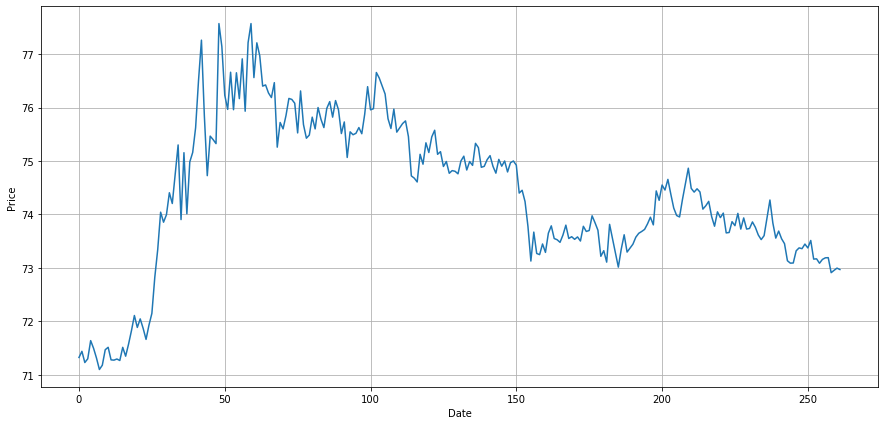

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize =(15,7) )
plt.plot(dataset['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

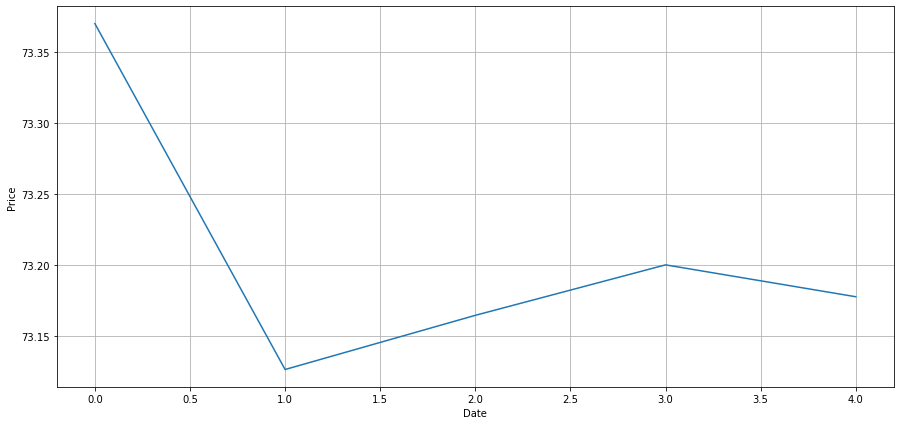

In [60]:
plt.figure(figsize =(15,7) )
plt.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()